<a href="https://colab.research.google.com/github/jorgejrzoca/MVP-Sprint-1/blob/main/MVP_MachineLearning_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

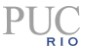

# **MVP Machine Learning e Analytics**

Jorge de Figueiredo Costa Junior
---


#1. Definição do problema

Para esse projeto foi utilizada a base de dados de qualidade da água contém informações sobre características de qualidade da água e potabilidade.

Vamos verificar se conseguimos treinar um modelo para verificar a potabilidade da água baseada em suas características.





**Informações sobre os atributos:**
1. **pH:** pH da água (medido em unidades de pH)A classificação do bilionário em termos de riqueza.
2. **Hardness:** Dureza da água (medida em mg/L).
3. **Solids:** Total de sólidos dissolvidos na água (medido em ppm).
4. **Chloramines:** Quantidade de cloraminas na água (medida em ppm).
5. **Sulfate:** Quantidade de sulfato na água (medida em mg/L).
6. **Conductivity:** ondutividade da água (medida em μS/cm).
7. **Organic_carbon:** Quantidade de carbono orgânico na água (medida em ppm).
8. **Trihalomethanes:** Quantidade de trialometanos na água (medida em μg/L).
9. **Turbidity:** Turbidez da água (medida em NTU).
10. **Potability:** Potabilidade da água (1 indica potável, 0 indica não potável).


#2. Carga de Dados e Análise

Vamos importar as livrarias necessárias e efetuar uma pequena análise dos dados.







In [186]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [187]:
# Carregando arquivo csv usando Pandas usando uma URL

# URL de importação da base de dados
url = "https://raw.githubusercontent.com/jorgejrzoca/MVP_Machine_Learning/main/water_potability.csv"

# Leitura do arquivo utilizando as colunas informadas
df = pd.read_csv(url, delimiter=',')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [188]:
# Mostrando um resumo das colunas do banco

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#3. Preparando os dados

Vamos preparar os dados e verificar correlação dos atributos.

In [189]:
df.shape

(3276, 10)

In [190]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [191]:
# verificando o dado de potabilidade que será o nosso target

df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

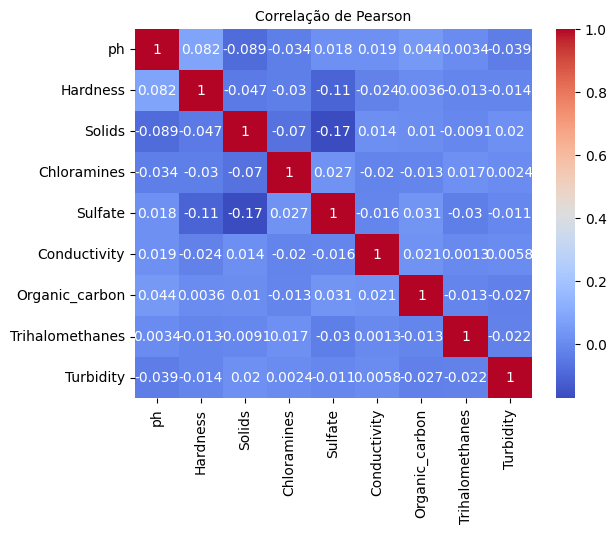

In [192]:
# aplicando a correlação de pearson

sns.heatmap(df[numeric_columns].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlação de Pearson', fontsize=10)
plt.show()

Verificando a correlação do parametro 'Hardness' com o 'ph'

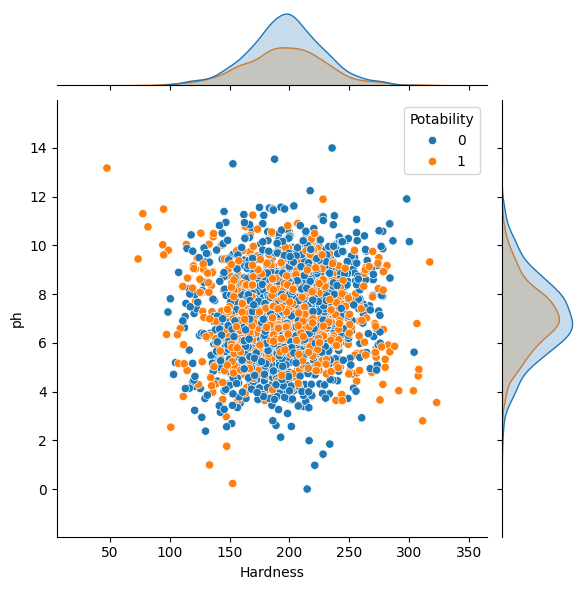

In [193]:
# Analisando Hardness e ph com a Potabilidade

sns.jointplot(data= df, x= 'Hardness', y= 'ph', hue= 'Potability')

plt.show()

In [194]:
# Verificando a quantidade de parametros vazios

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [195]:
# Checando o valor de dados ausentes

def print_missing_percentage(df, column_name):
    missing_values = df[column_name].isnull().sum()
    total_values = len(df)
    missing_values_perc = (missing_values / total_values) * 100
    print(f'Perda de {missing_values_perc:.2f}% de valores de {column_name}.')

columns_to_check = ["ph", "Trihalomethanes", "Sulfate"]
for column in columns_to_check:
    print_missing_percentage(df, column)

Perda de 14.99% de valores de ph.
Perda de 4.95% de valores de Trihalomethanes.
Perda de 23.84% de valores de Sulfate.


In [196]:
# sendo que faltam menos de 5% dos valores de Trihalometanos, # podemos imputar a esta coluna um valor médio

from sklearn.impute import SimpleImputer, IterativeImputer
import pandas as pd

# Imputação para Trihalomethanes usando a média
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Trihalomethanes'] = imputer.fit_transform(df['Trihalomethanes'].to_frame())

# Imputação para 'ph' e 'Sulfate' usando o IterativeImputer (MICE)
df_inputs = df[numeric_columns].drop(['Trihalomethanes', 'ph', 'Sulfate'], axis=1)

mice_imputer = IterativeImputer(max_iter=10000, n_nearest_features=df_inputs.shape[1])
imputed_data = mice_imputer.fit_transform(df_inputs)

In [197]:
df_inputs.isna().sum()

Hardness          0
Solids            0
Chloramines       0
Conductivity      0
Organic_carbon    0
Turbidity         0
dtype: int64

#4. Criação dos modelos e testes

Vamos analisar os modelos Logistic Regression, K-Nearest Neighbors, Random Forest e Support Vector Classifier.

In [198]:
# Divisão de teste e treino

X = df_inputs
Y = df['Potability']

# Divisão do conjunto de dados com estratificação
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.7, stratify=Y)

# Agora X_train, X_test, Y_train, Y_test estão estratificados em relação à variável de destino 'Potability'

In [199]:
# APlicando scala

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Chamada da função para padronizar os dados
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

A utilização de um valor beta menor que zero (no caso, 0.5) no critério de seleção do melhor modelo em cada etapa de validação cruzada (CV) é uma estratégia para priorizar a precisão do modelo, especialmente em problemas em que se deseja minimizar os falsos positivos.


In [200]:
#
beta_value= 0.5

Vamos aplicar os modelos. (levando cerca de 3 minutos)

In [201]:
# Logistic Regression
LR_model = LogisticRegression(random_state=42, class_weight="balanced")
LR_model.fit(X_train_scaled, Y_train)
train_predictions_lr = LR_model.predict(X_train_scaled)
test_predictions_lr = LR_model.predict(X_test_scaled)
fbeta_score_lr = fbeta_score(Y_test, test_predictions_lr, beta=beta_value)

# K-Nearest Neighbors
KNC_model = KNeighborsClassifier()
KNC_grid = GridSearchCV(KNC_model, {"n_neighbors": [int(i) for i in np.linspace(1, 100, 100)]}, refit=True, scoring=custom_scorer)
KNC_grid.fit(X_train_scaled, Y_train)
train_predictions_knc = KNC_grid.predict(X_train_scaled)
test_predictions_knc = KNC_grid.predict(X_test_scaled)

# Random Forest
RFC_model = RandomForestClassifier(n_estimators=200)
RFC_random = RandomizedSearchCV(RFC_model, {"max_depth": [int(i) for i in np.linspace(2, 100, 99)]}, refit=True, scoring=custom_scorer, n_iter=20)
RFC_random.fit(X_train_scaled, Y_train)
train_predictions_rfc = RFC_random.predict(X_train_scaled)
test_predictions_rfc = RFC_random.predict(X_test_scaled)

# Support Vector Classifier
SVC_model = SVC()
SVC_random = RandomizedSearchCV(SVC_model, [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                                            {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                                            {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                                refit=True, scoring=custom_scorer, n_iter=10)
SVC_random.fit(X_train_scaled, Y_train)
train_predictions_svc = SVC_random.predict(X_train_scaled)
test_predictions_svc = SVC_random.predict(X_test_scaled)

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando todas as métricas para cada modelo
metrics_lr = [accuracy_score(Y_test, test_predictions_lr),
              precision_score(Y_test, test_predictions_lr),
              recall_score(Y_test, test_predictions_lr),
              f1_score(Y_test, test_predictions_lr)]

metrics_knc = [accuracy_score(Y_test, test_predictions_knc),
               precision_score(Y_test, test_predictions_knc),
               recall_score(Y_test, test_predictions_knc),
               f1_score(Y_test, test_predictions_knc)]

metrics_rfc = [accuracy_score(Y_test, test_predictions_rfc),
               precision_score(Y_test, test_predictions_rfc),
               recall_score(Y_test, test_predictions_rfc),
               f1_score(Y_test, test_predictions_rfc)]

metrics_svc = [accuracy_score(Y_test, test_predictions_svc),
               precision_score(Y_test, test_predictions_svc),
               recall_score(Y_test, test_predictions_svc),
               f1_score(Y_test, test_predictions_svc)]

# Criando o DataFrame com todas as métricas
df_metrics = pd.DataFrame([metrics_lr, metrics_knc, metrics_rfc, metrics_svc],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Support Vector Classifier'])

# Exibindo o DataFrame
print(df_metrics)

                           Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.502543   0.387234  0.475196  0.426729
K-Nearest Neighbors        0.541200   0.400585  0.357702  0.377931
Random Forest              0.584944   0.433862  0.214099  0.286713
Support Vector Classifier  0.597152   0.458065  0.185379  0.263941


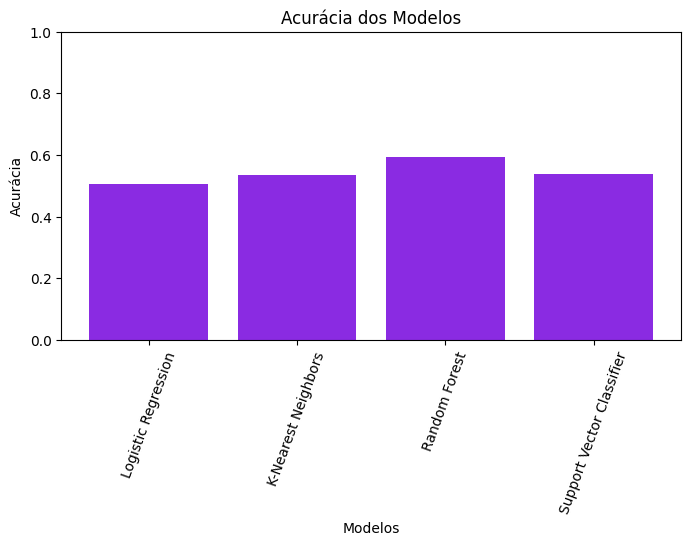

In [205]:
# Modelos e acurácias
modelos = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Support Vector Classifier']
acuracias = [accuracy_lr, accuracy_knc, accuracy_rfc, accuracy_svc]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(modelos, acuracias, color='blueviolet')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Acurácia dos Modelos')
plt.ylim(0, 1)
plt.xticks(rotation=70)
plt.show()

Comparando os algoritmos, vimos que o Random Forest foi quem trouxa o melhor resultado. Com isso, vamos seguir os testes com esse modelo.


In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliação do desempenho nos dados de treino
train_predictions_rfc = RFC_random.predict(X_train_scaled)
train_accuracy_rfc = accuracy_score(Y_train, train_predictions_rfc)
train_precision_rfc = precision_score(Y_train, train_predictions_rfc)
train_recall_rfc = recall_score(Y_train, train_predictions_rfc)
train_f1_rfc = f1_score(Y_train, train_predictions_rfc)

# Avaliação do desempenho nos dados de teste
test_accuracy_rfc = accuracy_score(Y_test, test_predictions_rfc)
test_precision_rfc = precision_score(Y_test, test_predictions_rfc)
test_recall_rfc = recall_score(Y_test, test_predictions_rfc)
test_f1_rfc = f1_score(Y_test, test_predictions_rfc)

# Verificando se há sinais de overfitting
overfitting_rfc = train_accuracy_rfc - test_accuracy_rfc

print("Desempenho do modelo Random Forest nos dados de treino:")
print("Acurácia:", train_accuracy_rfc)
print("Precisão:", train_precision_rfc)
print("Recall:", train_recall_rfc)
print("F1-Score:", train_f1_rfc)

print("\nDesempenho do modelo Random Forest nos dados de teste:")
print("Acurácia:", test_accuracy_rfc)
print("Precisão:", test_precision_rfc)
print("Recall:", test_recall_rfc)
print("F1-Score:", test_f1_rfc)

print("\nSinal de overfitting para o modelo Random Forest:", overfitting_rfc)

Desempenho do modelo Random Forest nos dados de treino:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0

Desempenho do modelo Random Forest nos dados de teste:
Acurácia: 0.5849440488301119
Precisão: 0.43386243386243384
Recall: 0.21409921671018275
F1-Score: 0.2867132867132867

Sinal de overfitting para o modelo Random Forest: 0.41505595116988814


Para melhora dos dados, tentativa de aplicar hiperparametros para melhora do resultado.

In [207]:
# Criando o modelo Random Forest
rfc = RandomForestClassifier(random_state=42)

# Realizando a busca em grade
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliando o desempenho do modelo com os melhores hiperparâmetros nos dados de teste
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, test_predictions)
print("Acurácia do modelo com os melhores hiperparâmetros nos dados de teste:", accuracy)

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Acurácia do modelo com os melhores hiperparâmetros nos dados de teste: 0.6073245167853509


In [173]:
# Definindo os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Criando o modelo Random Forest
rfc = RandomForestClassifier(random_state=42)

# Realizando a busca em grade
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliando o desempenho do modelo com os melhores hiperparâmetros nos dados de teste
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, test_predictions)
print("Acurácia do modelo com os melhores hiperparâmetros nos dados de teste:", accuracy)

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Acurácia do modelo com os melhores hiperparâmetros nos dados de teste: 0.6073245167853509


In [174]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo Random Forest com os melhores hiperparâmetros encontrados
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Realizando a validação cruzada com k=5 (por exemplo)
cv_scores = cross_val_score(best_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')

# Calculando a média e o desvio padrão das pontuações
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print("Média da acurácia da validação cruzada:", mean_accuracy)
print("Desvio padrão da acurácia da validação cruzada:", std_accuracy)

Média da acurácia da validação cruzada: 0.6083768587493221
Desvio padrão da acurácia da validação cruzada: 0.012256015769282013


In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliação do desempenho nos dados de treino
train_predictions_rfc = RFC_random.predict(X_train_scaled)
train_accuracy_rfc = accuracy_score(Y_train, train_predictions_rfc)
train_precision_rfc = precision_score(Y_train, train_predictions_rfc)
train_recall_rfc = recall_score(Y_train, train_predictions_rfc)
train_f1_rfc = f1_score(Y_train, train_predictions_rfc)

# Avaliação do desempenho nos dados de teste
test_accuracy_rfc = accuracy_score(Y_test, test_predictions_rfc)
test_precision_rfc = precision_score(Y_test, test_predictions_rfc)
test_recall_rfc = recall_score(Y_test, test_predictions_rfc)
test_f1_rfc = f1_score(Y_test, test_predictions_rfc)

# Verificando se há sinais de overfitting
overfitting_rfc = train_accuracy_rfc - test_accuracy_rfc

print("Desempenho do modelo Random Forest nos dados de treino:")
print("Acurácia:", train_accuracy_rfc)
print("Precisão:", train_precision_rfc)
print("Recall:", train_recall_rfc)
print("F1-Score:", train_f1_rfc)

print("\nDesempenho do modelo Random Forest nos dados de teste:")
print("Acurácia:", test_accuracy_rfc)
print("Precisão:", test_precision_rfc)
print("Recall:", test_recall_rfc)
print("F1-Score:", test_f1_rfc)

print("\nSinal de overfitting para o modelo Random Forest:", overfitting_rfc)

Desempenho do modelo Random Forest nos dados de treino:
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0

Desempenho do modelo Random Forest nos dados de teste:
Acurácia: 0.5920651068158698
Precisão: 0.45
Recall: 0.21148825065274152
F1-Score: 0.28774422735346356

Sinal de overfitting para o modelo Random Forest: 0.40793489318413023


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definindo os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Realizando a busca aleatória dos melhores hiperparâmetros
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, Y_train)

# Obtendo os melhores hiperparâmetros
best_params = rf_random.best_params_
print("Melhores hiperparâmetros encontrados:")
print(best_params)

# Testando o modelo com os melhores hiperparâmetros nos dados de teste
best_rf_model = rf_random.best_estimator_
test_predictions_best = best_rf_model.predict(X_test_scaled)

# Avaliando o desempenho do modelo com os melhores hiperparâmetros
test_accuracy_best = accuracy_score(Y_test, test_predictions_best)
test_precision_best = precision_score(Y_test, test_predictions_best)
test_recall_best = recall_score(Y_test, test_predictions_best)
test_f1_best = f1_score(Y_test, test_predictions_best)

print("\nDesempenho do modelo Random Forest nos dados de teste com os melhores hiperparâmetros:")
print("Acurácia:", test_accuracy_best)
print("Precisão:", test_precision_best)
print("Recall:", test_recall_best)
print("F1-Score:", test_f1_best)

Melhores hiperparâmetros encontrados:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

Desempenho do modelo Random Forest nos dados de teste com os melhores hiperparâmetros:
Acurácia: 0.6073245167853509
Precisão: 0.47761194029850745
Recall: 0.0835509138381201
F1-Score: 0.14222222222222222


In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predições nos dados de treino e de teste
train_predictions = best_rf_model.predict(X_train_scaled)
test_predictions = best_rf_model.predict(X_test_scaled)

# Métricas de avaliação nos dados de treino
train_accuracy = accuracy_score(Y_train, train_predictions)
train_precision = precision_score(Y_train, train_predictions)
train_recall = recall_score(Y_train, train_predictions)
train_f1 = f1_score(Y_train, train_predictions)

print("Desempenho do modelo Random Forest nos dados de treino:")
print("Acurácia:", train_accuracy)
print("Precisão:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

# Métricas de avaliação nos dados de teste
test_accuracy = accuracy_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)
test_f1 = f1_score(Y_test, test_predictions)

print("\nDesempenho do modelo Random Forest nos dados de teste:")
print("Acurácia:", test_accuracy)
print("Precisão:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

Desempenho do modelo Random Forest nos dados de treino:
Acurácia: 0.7121674662014827
Precisão: 0.921146953405018
Recall: 0.2871508379888268
F1-Score: 0.4378194207836457

Desempenho do modelo Random Forest nos dados de teste:
Acurácia: 0.7131230925737538
Precisão: 0.9105691056910569
Recall: 0.2924281984334204
F1-Score: 0.4426877470355732


In [209]:
# Exibir as primeiras 10 predições para os dados de teste
print("Primeiras 10 predições nos dados de teste:")
print(test_predictions[:10])

print("Primeiras 10 predições nos dados de treino:")
print(train_predictions[:10])

Primeiras 10 predições nos dados de teste:
[0 0 0 0 0 0 0 0 0 0]
Primeiras 10 predições nos dados de treino:
[0 0 0 1 0 0 0 0 0 0]


In [210]:
# Comparar predições com os dados verdadeiros nos dados de teste
print("Comparação com os dados verdadeiros nos dados de teste:")
for i in range(10):  # Comparar apenas as primeiras 10 predições
    print(f"Predição: {test_predictions[i]}, Valor Real: {Y_test.iloc[i]}")

# Comparar predições com os dados verdadeiros nos dados de treino
print("\nComparação com os dados verdadeiros nos dados de treino:")
for i in range(10):  # Comparar apenas as primeiras 10 predições
    print(f"Predição: {train_predictions[i]}, Valor Real: {Y_train.iloc[i]}")

Comparação com os dados verdadeiros nos dados de teste:
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 1
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 1
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0

Comparação com os dados verdadeiros nos dados de treino:
Predição: 0, Valor Real: 1
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 1
Predição: 1, Valor Real: 1
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 0
Predição: 0, Valor Real: 1


In [211]:
# Calcular a precisão nos dados de teste
test_correct = sum(1 for pred, true in zip(test_predictions, Y_test) if pred == true)
test_accuracy = test_correct / len(Y_test)

print(f"Porcentagem de acertos nos dados de teste: {test_accuracy * 100:.2f}%")

Porcentagem de acertos nos dados de teste: 71.31%


#5. Conclusão

Como foi indicado durante otrabalho, ao final da realização de uma seleção de modelos, optou-se pela métrica F_beta utilizando um valor beta menor que 1, priorizando também a precisão do modelo, sobre o recall. O resultado é importante para evitar falsos positivos, pois rotular uma água como potável quando ela não é realmente pode resultar em consequências para a saúde das pessoas que consomem.

Poderíamos dizer que para decidir que um modelo de classificação "atende" quando o valor da acurácia é igual ou maior que 0,8. Como podemos ver no resultado deste trabalho, o maior valor obtido é de 0,71 pelo algoritmo RandomForestClassifier.

Para tentar melhorar as especificações obtidas pelos diferentes modelos, foram testadas as seguintes técnicas. No entanto, nenhum deles foi útil para cumprir o objetivo proposto.

Como hipótese, planeja-se a possibilidade de que a distribuição dos dados não permita sua boa separação, devido ao isolamento das águas rotuladas como potável e não potável.

Para melhorar esta situação, precisa-se melhorar a qualidade dos dados, o que é fundamental para registrar bons resultados, sem importar o algoritmo escolhido.
